In [1]:
%cd ..

d:\Code\WRSN\Code\load_balancing\multi_agent_rl_wrsn


In [2]:
%ls

 Volume in drive D is D:
 Volume Serial Number is 06DC-43C8

 Directory of d:\Code\WRSN\Code\load_balancing\multi_agent_rl_wrsn

05/03/2024  04:21 PM    <DIR>          .
05/03/2024  04:21 PM    <DIR>          ..
05/04/2024  10:19 AM            14,495 clusters.json
05/03/2024  04:20 PM                 1 listTargets.json
04/14/2024  07:30 AM    <DIR>          physical_env
05/03/2024  04:38 PM    <DIR>          runner
               2 File(s)         14,496 bytes
               4 Dir(s)  199,701,037,056 bytes free


Danh sách các thư mục hiện tại:
.git
physical_env
runner
Danh sách các thư mục hiện tại:
.git
physical_env
runner
Danh sách các thư mục hiện tại:
.git
physical_env
runner


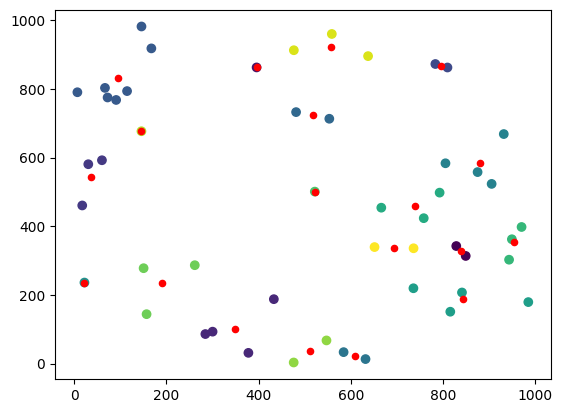

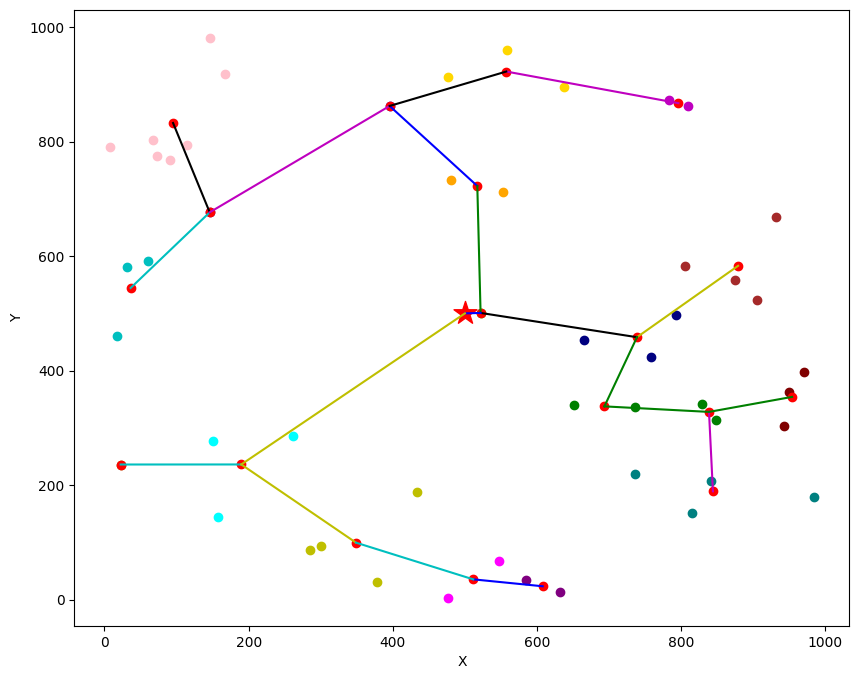

0 2 1
1 2 1
2 1 1
3 0 1
4 0 1
5 0 1
6 1 1
7 0 1
8 0 1
9 0 1
10 0 1
11 2 1
12 0 1
13 2 1
14 2 1
15 1 1
16 2 1
17 1 1
18 1 1
3


In [3]:
import sys
import os
# sys.path.append(os.path.dirname(os.path.dirname(__file__)))
from physical_env.network.NetworkIO import NetworkIO


netIO = NetworkIO("physical_env/network/network_scenarios/bacgiang_50.yaml")
env, net = netIO.makeNetwork()



In [4]:
for node in net.listNodes:
    print(node.location, type(node))

[466.34892921688106, 809.6546097838493] <class 'Nodes.RelayNode.RelayNode'>
[259.31609591062613, 173.8424765130807] <class 'Nodes.RelayNode.RelayNode'>
[204.54594950649476, 205.0053242744412] <class 'Nodes.RelayNode.RelayNode'>
[91.11910306106392, 610.3917259259964] <class 'Nodes.RelayNode.RelayNode'>
[759.5029233057579, 890.1129940668096] <class 'Nodes.RelayNode.RelayNode'>
[682.8956964137691, 913.1636510622044] <class 'Nodes.RelayNode.RelayNode'>
[610.1172169012375, 935.0622608403004] <class 'Nodes.RelayNode.RelayNode'>
[140.56652678746022, 774.4501256964484] <class 'Nodes.RelayNode.RelayNode'>
[558.7996539858623, 642.493484591591] <class 'Nodes.RelayNode.RelayNode'>
[560.2554698793754, 571.6392255076972] <class 'Nodes.RelayNode.RelayNode'>
[599.6831467515643, 29.508013618399445] <class 'Nodes.RelayNode.RelayNode'>
[859.1252917503332, 529.9267241022321] <class 'Nodes.RelayNode.RelayNode'>
[818.8762937806127, 494.16128398981084] <class 'Nodes.RelayNode.RelayNode'>
[126.09817373578645,

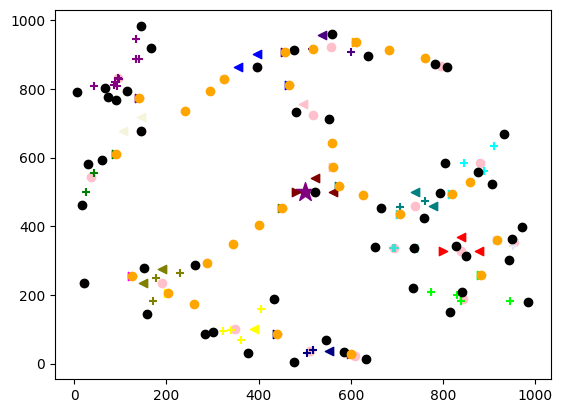

In [15]:
import matplotlib.pyplot as plt


  

plt.figure() 

colors = ['red', 'blue', 'yellow', 'green', 'orange', 'purple', 'pink', 'brown', 'cyan', 'magenta', 'lime', 'teal', 'lavender', 'maroon', 'olive', 'navy', 'beige', 'indigo', 'turquoise']
shapes = ['<', '>', '+', 'p', 'x', '*', '^', 'v', 'h', 's', 'p', 'o']

plt.scatter(net.baseStation.location[0], net.baseStation.location[1], marker= "*", color = "purple",s = 200)
for j in range(0,len(net.listClusters)):
 plt.scatter(net.listClusters[j].centroid[0],net.listClusters[j].centroid[1],color = "pink")
 for i in range(0,len(net.listClusters[j].listNodes)):
    x = net.listClusters[j].listNodes[i].location[0]
    y = net.listClusters[j].listNodes[i].location[1]
    z = net.listClusters[j].listNodes[i].__class__.__name__
    if(z == "InNode"): marker_ = shapes[0]
    if(z == "OutNode"):  marker_ = shapes[1]
    if(z == "SensorNode"): marker_ = shapes[2]
    if(z == "RelayNode"):  marker_ = shapes[3]
    plt.scatter(x, y, color = colors[j] , marker = marker_)
 for i in range(0,len(net.listClusters[j].listTargets)):
    x = net.listClusters[j].listTargets[i].location[0]
    y = net.listClusters[j].listTargets[i].location[1]
    plt.scatter(x, y, color = "black")

test_list = []
for node in net.listNodes:
    if node.__class__.__name__ == "RelayNode":
        test_list.append(node)

for node in test_list:
   x = node.location[0]
   y = node.location[1]
   plt.scatter(x, y, color = "orange")




plt.show()



In [ ]:
test_list = net.createNodeBetweenCluster()
for node in test_list:
   x = node.location[0]
   y = node.location[1]
   plt.scatter(x, y, color = "orange")

In [13]:
def getNode(nodetype):
    rs = []
    for node in net.listNodes:
        if 

[]